In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from scipy import stats
import textwrap

data = pd.read_csv('data/PIXELS-BACKUP-2024-10-08T22_40_14.200843.csv')

# for formatting
headline1 = "\n----------|"
headline2 = "|----------\n"
headline3 = "|---|"

data.head()


,date,type,scores__001,scores__002,scores__003,notes
0,2021-1-1,Mood,2,NaN,NaN,NaN
1,2021-1-2,Mood,3,NaN,NaN,NaN
2,2021-1-3,Mood,2,NaN,NaN,NaN
3,2021-1-4,Mood,2,NaN,NaN,NaN
4,2021-1-5,Mood,2,NaN,NaN,NaN


In [3]:
# feature engineering

# need to create an overall score per day
for i, row in data.iterrows():
    if pd.isnull(row['scores__003']) and pd.isnull(row['scores__002']):
        data.loc[i, 'score'] = row['scores__001']
    elif pd.isnull(row['scores__003']):
        data.loc[i, 'score'] = (row['scores__001'] + row['scores__002']) / 2
    else:
        data.loc[i, 'score'] = (row['scores__001'] + row['scores__002'] + row['scores__003']) / 3


# convert date column to datetime format
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# creating month and year columns
data['month'] = data.index.month
data['year'] = data.index.year


# creating total words and characters per day columns
# fill note's null values
data['notes'] = data['notes'].fillna("")

# iterate through and check for null, then count words & characters
for i, row in data.iterrows():
    if pd.isnull(row['notes']):
        continue
    else:
        # Count words
        data.loc[i, 'word_count'] = len(str(row['notes']).split())
        
        # Count characters
        data.loc[i, 'char_count'] = len(str(row['notes']))


# average score per month
data['monthly_avg_score'] = data.groupby(['year', 'month'])['score'].transform('mean')



data.head()

,type,scores__001,scores__002,scores__003,notes,score,month,year,word_count,char_count,monthly_avg_score
date,,,,,,,,,,,
2021-01-01,Mood,2,NaN,NaN,,2.0,1,2021,0.0,0.0,2.516129
2021-01-02,Mood,3,NaN,NaN,,3.0,1,2021,0.0,0.0,2.516129
2021-01-03,Mood,2,NaN,NaN,,2.0,1,2021,0.0,0.0,2.516129
2021-01-04,Mood,2,NaN,NaN,,2.0,1,2021,0.0,0.0,2.516129
2021-01-05,Mood,2,NaN,NaN,,2.0,1,2021,0.0,0.0,2.516129



----------| Datatypes |----------
type                  object
scores__001            int64
scores__002          float64
scores__003          float64
notes                 object
score                float64
month                  int32
year                   int32
word_count           float64
char_count           float64
monthly_avg_score    float64
dtype: object

----------| Rows |----------
1374

----------| Columns |----------
11

----------| Missing Data Count |----------
type                    0
scores__001             0
scores__002          1329
scores__003          1369
notes                   0
score                   0
month                   0
year                    0
word_count              0
char_count              0
monthly_avg_score       0
dtype: int64


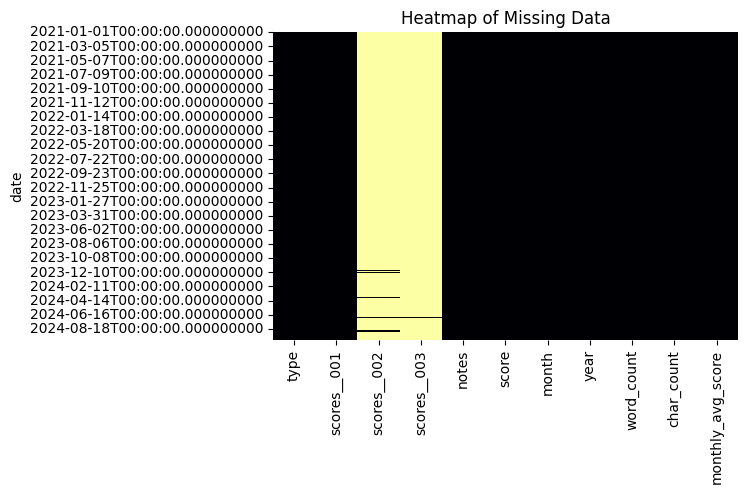

,type,scores__001,scores__002,scores__003,notes,score,month,year,word_count,char_count,monthly_avg_score
date,,,,,,,,,,,
2021-01-01,Mood,2,NaN,NaN,,2.0,1,2021,0.0,0.0,2.516129
2021-01-02,Mood,3,NaN,NaN,,3.0,1,2021,0.0,0.0,2.516129
2021-01-03,Mood,2,NaN,NaN,,2.0,1,2021,0.0,0.0,2.516129
2021-01-04,Mood,2,NaN,NaN,,2.0,1,2021,0.0,0.0,2.516129
2021-01-05,Mood,2,NaN,NaN,,2.0,1,2021,0.0,0.0,2.516129


In [4]:
# summary statistics

# to print datatypes
print(f"{headline1} Datatypes {headline2}{data.dtypes}")

# # of rows
print(f"{headline1} Rows {headline2}{len(data.axes[0])}")

# # of columns
print(f"{headline1} Columns {headline2}{len(data.axes[1])}")

# # of missing values
print(f"{headline1} Missing Data Count {headline2}{data.isnull().sum()}")

# heatmap of missing values
plt.figure(figsize=(6,4))
sns.heatmap(data.isnull(), cbar=False, cmap="inferno")
plt.title("Heatmap of Missing Data")
plt.show()

data.head()

In [5]:
# line plot
def interactive_line_plot():
    fig = px.line(data, x=data.index, y='monthly_avg_score', title='Score Over Time')
    fig.show()

# call the interactive functions
interactive_line_plot()

In [6]:
# seasonal plot
def interactive_seasonal_plot():
    fig = px.line(data, x='month', y='score', color='year', title="Seasonal Plot of Score Across Years")
    fig.show()

interactive_seasonal_plot()

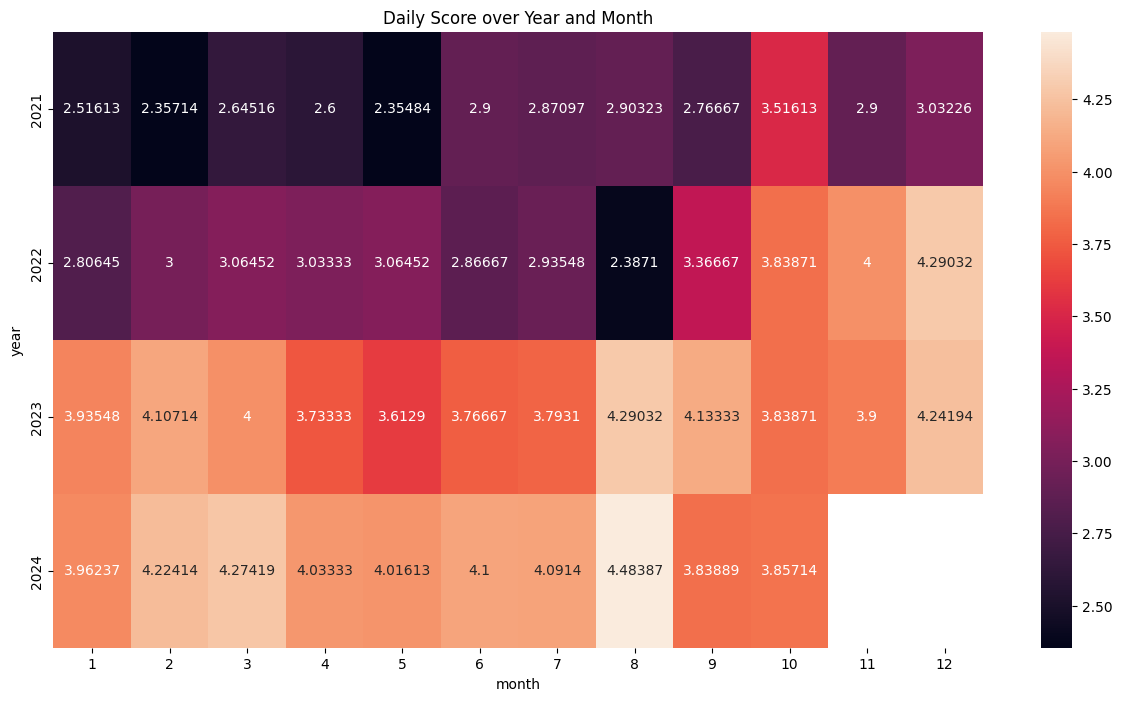

In [7]:
# prepping data for heatmap
heatmap_data = data.groupby(['year', 'month'])['score'].mean().unstack()


# heatmap of passenger count by month
plt.figure(figsize=(15,8))
sns.heatmap(heatmap_data, annot=True, fmt='g', annot_kws={"size":10})
plt.title("Daily Score over Year and Month")
plt.show()

In [8]:
def interactive_rolling_statistics_plot():
    rolling_mean = data['score'].rolling(window=30).mean()
    rolling_std = data['score'].rolling(window=30).std()

    fig = go.Figure()

    # stock Prices
    fig.add_trace(go.Scatter(x=data.index, y=data['score'], mode='lines', name='Score'))
    # rolling Mean
    fig.add_trace(go.Scatter(x=data.index, y=rolling_mean, mode='lines', name='30-Day Rolling Mean'))
    # rolling Standard Deviation
    fig.add_trace(go.Scatter(x=data.index, y=rolling_std, mode='lines', name='30-Day Rolling Std Dev'))

    fig.update_layout(title="Rolling Statistics Plot: Score Over Time", xaxis_title="Date", yaxis_title="Score")
    fig.show()

# call the interactive functions
interactive_rolling_statistics_plot()

In [9]:
# box plot by month
fig = px.box(data, x='month', y='score', title='Boxplot: Score by Month')
fig.show()

# box plot by year
fig = px.box(data, x='year', y='score', title='Boxplot: Score by Year')
fig.show()

### Word Count

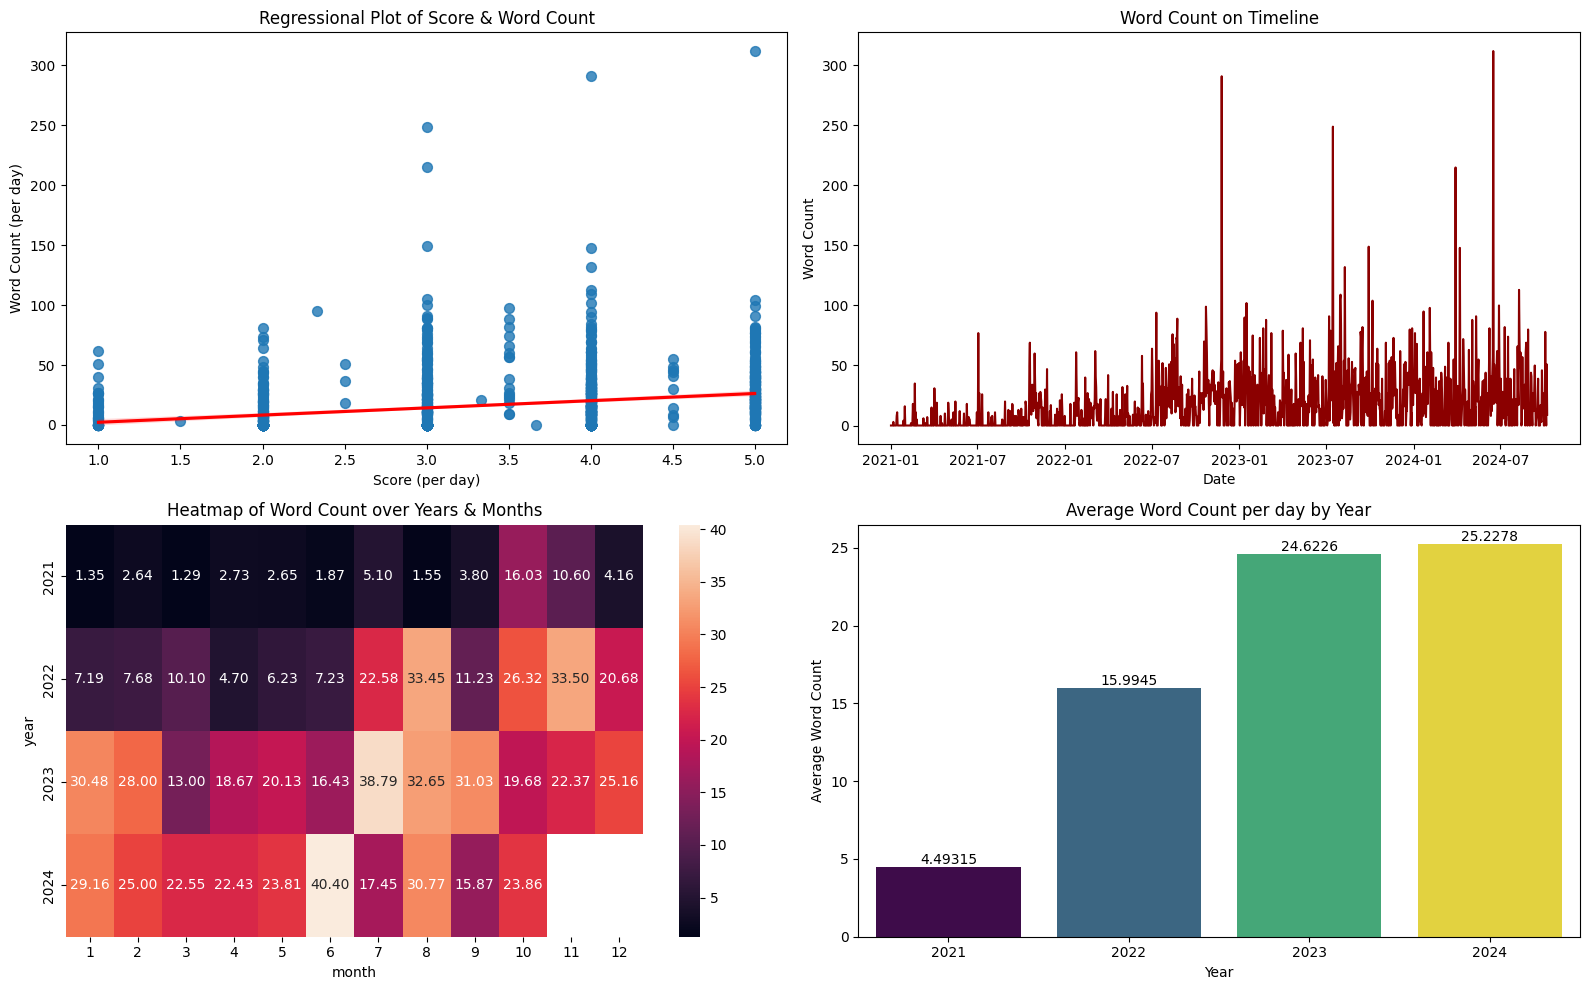

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# regressional plot of word count vs. score
sns.regplot(x='score', y='word_count', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'}, ax=axs[0,0])
axs[0,0].set_title("Regressional Plot of Score & Word Count")
axs[0,0].set_xlabel("Score (per day)")
axs[0,0].set_ylabel("Word Count (per day)")

# line plot of word count over time
sns.lineplot(data, x=data.index, y='word_count', ax=axs[0,1], color="darkred")
axs[0,1].set_title("Word Count on Timeline")
axs[0,1].set_xlabel("Date")
axs[0,1].set_ylabel("Word Count")

# heatmap of word count over year and month
heatmap_data = data.groupby(['year', 'month'])['word_count'].mean().unstack()
sns.heatmap(heatmap_data, annot=True, fmt='.2f', annot_kws={"size":10}, ax=axs[1,0])
axs[1,0].set_title("Heatmap of Word Count over Years & Months")

# bar plot of word count per year
fig = sns.barplot(data, x='year', y='word_count', palette='viridis', hue='year', legend=False, errorbar=None, ax=axs[1,1])
fig.bar_label(fig.containers[0], fontsize=10)
fig.bar_label(fig.containers[1], fontsize=10)
fig.bar_label(fig.containers[2], fontsize=10)
fig.bar_label(fig.containers[3], fontsize=10)
axs[1,1].set_title("Average Word Count per day by Year")
axs[1,1].set_xlabel("Year")
axs[1,1].set_ylabel("Average Word Count")

# Show plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_120068/2394526187.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




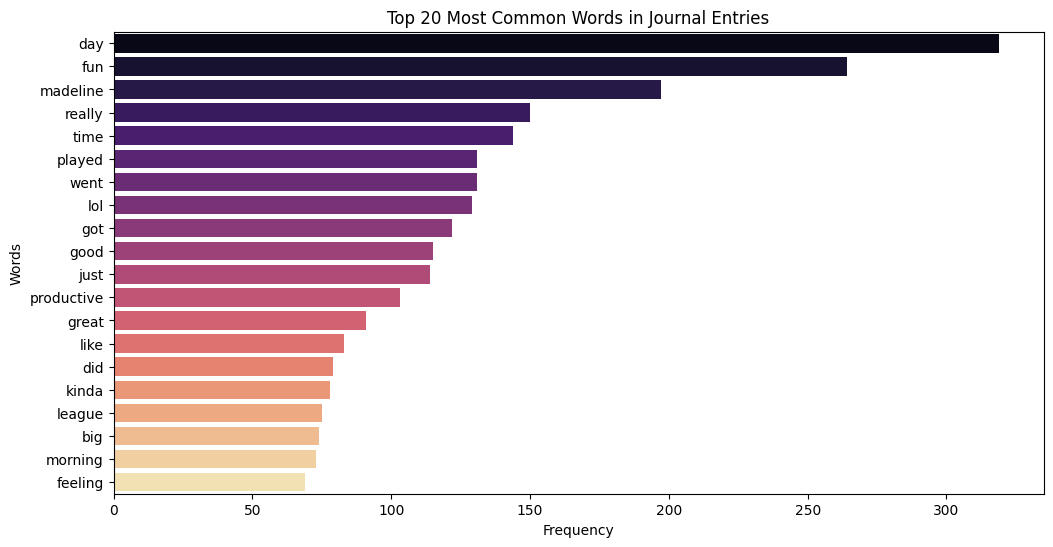

In [11]:
# appearances of certain words

# preprocess notes
def preprocess_text(note):
    note = note.lower()
    note = note.translate(str.maketrans("", "", string.punctuation))
    return note

data['cleaned_notes'] = data['notes'].apply(preprocess_text)

# Use CountVectorizer to count word occurrences
vectorizer = CountVectorizer(stop_words='english')  # 'english' stopwords are built-in
word_count = vectorizer.fit_transform(data['cleaned_notes'])

# Create a DataFrame with word counts
word_counts = pd.DataFrame(word_count.toarray(), columns=vectorizer.get_feature_names_out())
total_word_counts = word_counts.sum().sort_values(ascending=False)

# Convert to DataFrame for better visualization
word_counts_df = pd.DataFrame(total_word_counts).reset_index()
word_counts_df.columns = ['word', 'count']


# Visualize the most common words
top_n = 20  # Number of top words to visualize
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=word_counts_df.head(top_n), palette='magma')
plt.title('Top {} Most Common Words in Journal Entries'.format(top_n))
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()



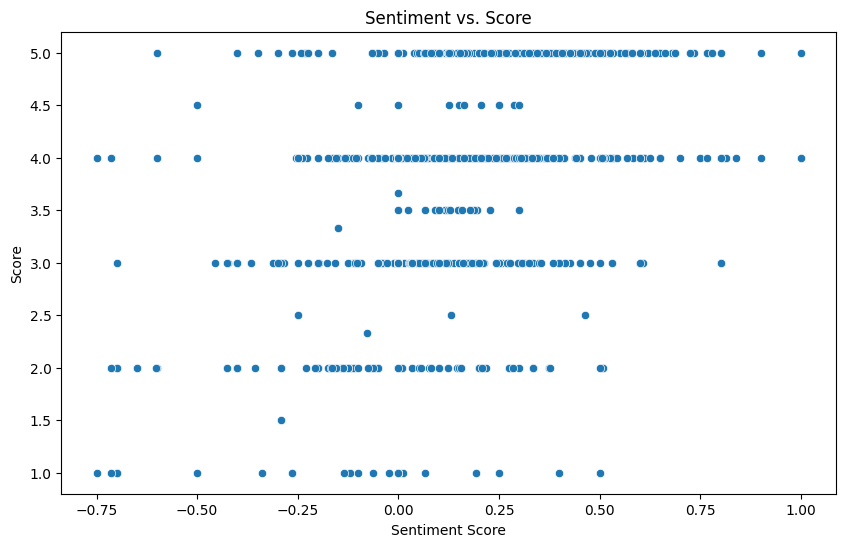

In [12]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # returns a score between -1 and 1 as a "sentiment polarity"

data['sentiment'] = data['notes'].apply(get_sentiment)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment', y='score', data=data)
plt.title('Sentiment vs. Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Score')
plt.show()


/tmp/ipykernel_120068/3816262638.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




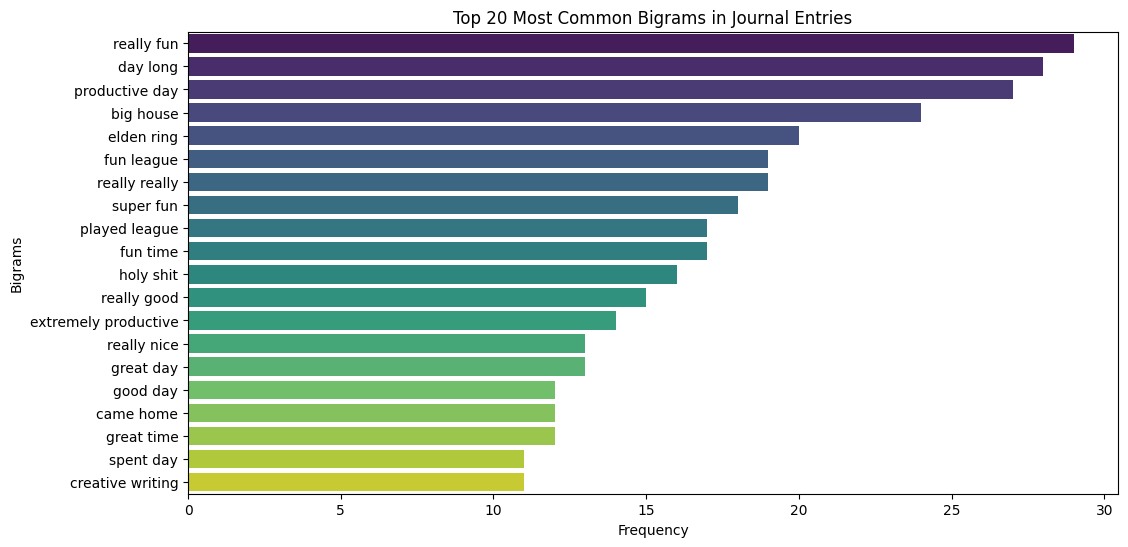

In [13]:
# Bigram analysis
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))
bigram_count = vectorizer.fit_transform(data['cleaned_notes'])
bigram_counts = pd.DataFrame(bigram_count.toarray(), columns=vectorizer.get_feature_names_out())
total_bigram_counts = bigram_counts.sum().sort_values(ascending=False)

# Convert to DataFrame for visualization
bigram_counts_df = pd.DataFrame(total_bigram_counts).reset_index()
bigram_counts_df.columns = ['bigram', 'count']

# Visualize top bigrams
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='bigram', data=bigram_counts_df.head(top_n), palette='viridis')
plt.title('Top {} Most Common Bigrams in Journal Entries'.format(top_n))
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()


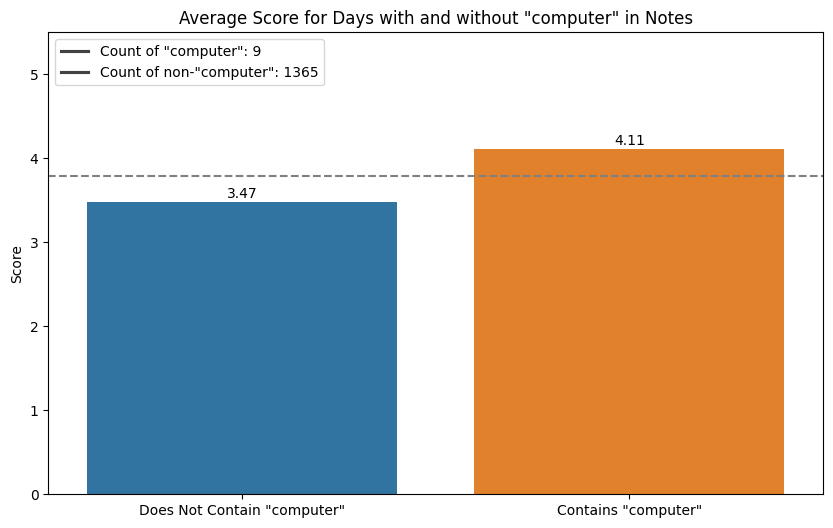


----------| Date: 2021-09-12 00:00:00 |---| Score: 4.0 |----------
got the cats into the new PDM, went to chilis with my girl, finally
set up my computer

----------| Date: 2022-08-05 00:00:00 |---| Score: 2.0 |----------
Bit better, went to Asian buffet, Ikea, talked with Madeline a lot,
kinda just chilled, played Elden Ring and also checked up on emails on
my computer which was phenomenal

----------| Date: 2022-10-28 00:00:00 |---| Score: 4.0 |----------
Productive day of setting up my computer, cleaning the house, then we
went to FoCo and impromptu had a really nice dinner then went to our
Airbnb and had sex lol it's been every night so far bro

----------| Date: 2022-12-16 00:00:00 |---| Score: 5.0 |----------
Fun intimate make-out and handjob (no cum lmao) moment with Madeline,
American Psycho with Kidz, planning Marley's computer together

----------| Date: 2022-12-30 00:00:00 |---| Score: 4.0 |----------
Spent the day building Marley's "Little_Friend" computer!!!! But
feeling 

In [19]:
# TODO: need to add a sort parameter for how to print the notes

def compare_average_score_with_term(data, term, print_note=0):
    # boolean column for if term is in note or not
    data['contains_term'] = data['notes'].str.contains(term, case=False)
    
    # get average score for days with term and without term
    avg_score_for_term = data.groupby('contains_term')['score'].mean().reset_index()
    avg_score_for_term['contains_term'] = avg_score_for_term['contains_term'].map({True: f'Contains "{term}"', False: f'Does Not Contain "{term}"'})
    
    # sum of term
    term_sum = data['contains_term'].sum()

    # start bar plot
    plt.figure(figsize=(10, 6))
    fig = sns.barplot(data=avg_score_for_term, x='contains_term', y='score', hue='contains_term', palette='tab10', legend=False)

    # overall average score line for entire dataset
    overall_avg = avg_score_for_term['score'].mean()
    plt.axhline(y=overall_avg, color='gray', linestyle='--', label='Overall Average Score')

    # average on score bars
    for index, row in avg_score_for_term.iterrows():
        fig.text(index, row['score'] + 0.05, f'{row["score"]:.2f}', ha='center')

    # add counts to legend
    not_term_count = len(data) - term_sum
    counts = [f'Count of "{term}": {term_sum}', f'Count of non-"{term}": {not_term_count}']
    plt.legend(counts, loc='upper left')

    plt.title(f'Average Score for Days with and without "{term}" in Notes')
    plt.ylabel('Score')
    plt.xlabel("")
    plt.ylim(0, 5.5)

    plt.show()

    # iterates through and prints notes with search term
    if print_note:

        count = 0   # count variable for amounth of notes to be printed
        how_many_prints = 0

        for i, row in data.iterrows():

            if count == print_note:
              break

            if row['contains_term']:
                wrapped_note = textwrap.fill(row['notes'])
                print(f"{headline1} Date: {row.name} {headline3} Score: {row['score']} {headline2}{wrapped_note}")   

                # counts how many successful prints occurred
                how_many_prints += 1

                # checks to see if all notes were requested 
                if count != "all":
                    count += 1

            else:
                continue

        print("\nHow many prints?:", how_many_prints)


compare_average_score_with_term(data, "computer", 5)

In [15]:
#TODO: Add a search by date